In [36]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

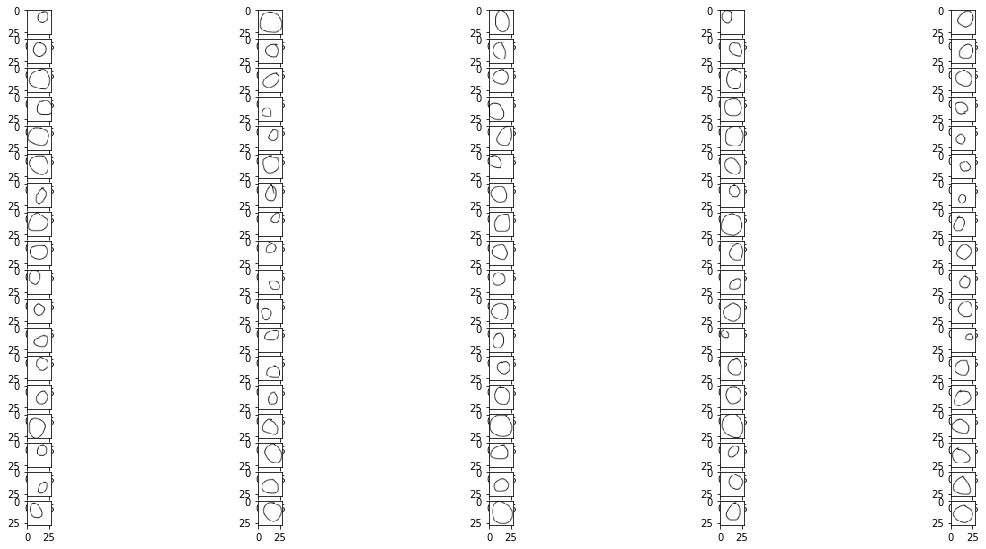

In [32]:
images_sqaure = []
for img_path in glob.glob('shapes/training/circles/*.png'):
    images_sqaure.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images_sqaure):
    plt.subplot(len(images_sqaure) / columns + 1, columns, i + 1)
    plt.imshow(image)

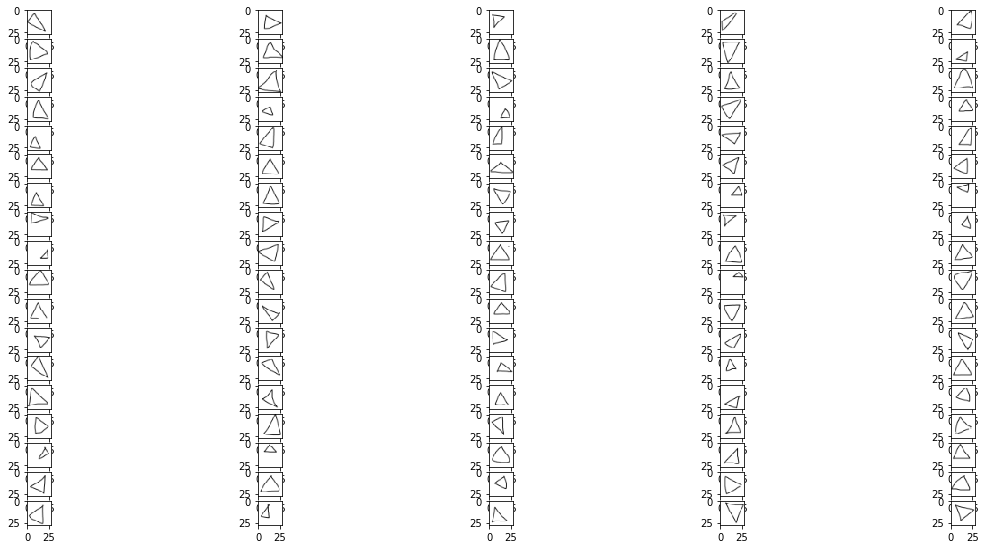

In [33]:
images_triangle = []
for img_path in glob.glob('shapes/training/triangles/*.png'):
    images_triangle.append(mpimg.imread(img_path))
    
#print(images_triangle)

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images_triangle):
    plt.subplot(len(images_triangle)/ columns+1, columns, i+1)
    plt.imshow(image)
    

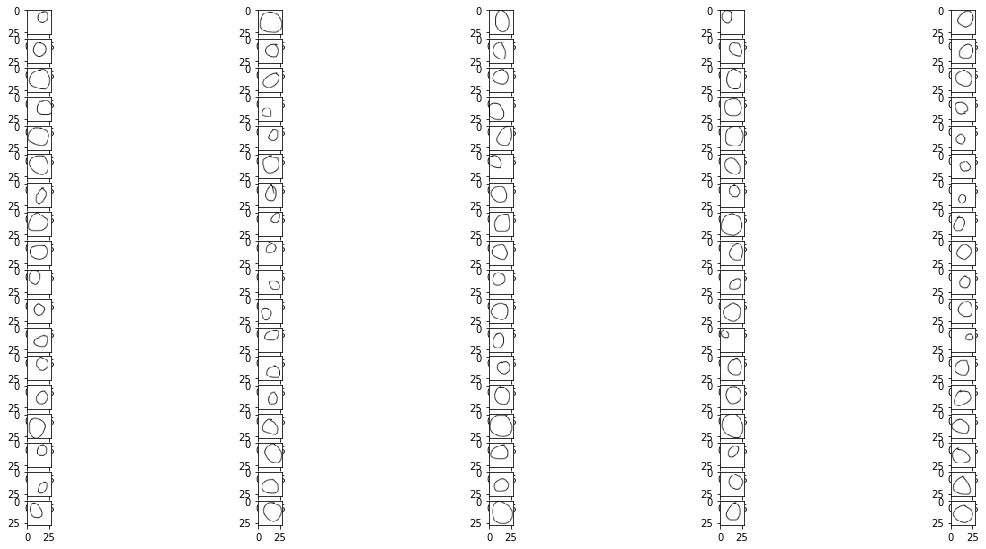

In [34]:
images_square = []

for img_path in glob.glob('shapes/training/sqaure/*.png'):
    images_sqaure.append(mpimg.imread(img_path))
    
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images_sqaure):
    plt.subplot(len(images_sqaure)/columns+1,columns,i+1)
    plt.imshow(image)

In [43]:
img = im.imread('shapes/training/squares/drawing(40).png')
img.shape

(28, 28, 3)

In [45]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,3),activation='relu'))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(64,(3,3),padding="same",activation='relu'))
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(64,(3,3),padding="same",activation='relu'))
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=512,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=3,activation='softmax'))

               

In [46]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)         

In [55]:
classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('shapes/training',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('shapes/test',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 270 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [71]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)


In [73]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 100,
                                   epochs = 20,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 50)

Epoch 1/20
 98/100 [============================>.] - ETA: 0s - loss: 0.0501 - accuracy: 0.9942
Epoch 00001: val_accuracy did not improve from 1.00000
100/100 [==============================] - 9s 91ms/step - loss: 0.0491 - accuracy: 0.9943 - val_loss: 2.1299e-05 - val_accuracy: 1.0000
Epoch 2/20
 98/100 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9852
Epoch 00002: val_accuracy did not improve from 1.00000
100/100 [==============================] - 9s 92ms/step - loss: 0.0913 - accuracy: 0.9849 - val_loss: 2.6529e-04 - val_accuracy: 1.0000
Epoch 3/20
 98/100 [============================>.] - ETA: 0s - loss: 0.2058 - accuracy: 0.9878
Epoch 00003: val_accuracy did not improve from 1.00000
100/100 [==============================] - 9s 89ms/step - loss: 0.2017 - accuracy: 0.9880 - val_loss: 3.6664e-04 - val_accuracy: 1.0000
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0848 - accuracy: 0.9898
Epoch 00004: val_accuracy did not improve f

In [74]:
classifier.load_weights('best_weights.hdf5')

In [75]:
classifier.save('shapes_cnn.h5')

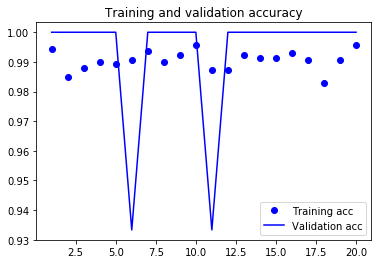

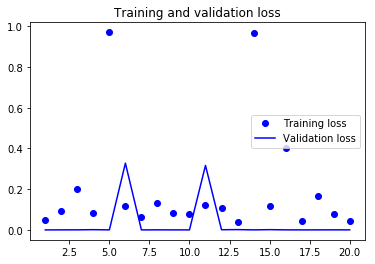

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

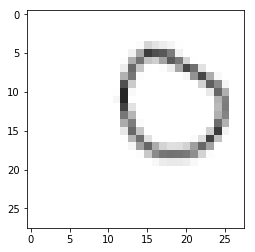

(1, 28, 28, 3)


In [103]:
img_path = 'shapes/test/circles/drawing(92).png'

img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [104]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [0]


In [105]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input


In [106]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation


In [107]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


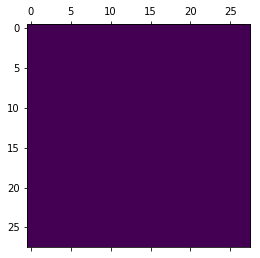

In [108]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


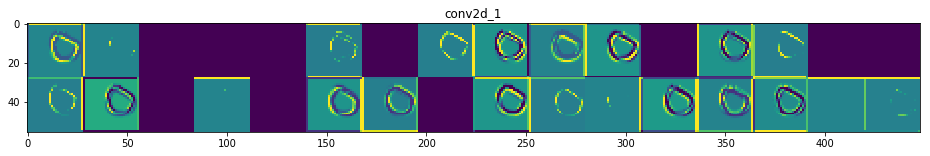

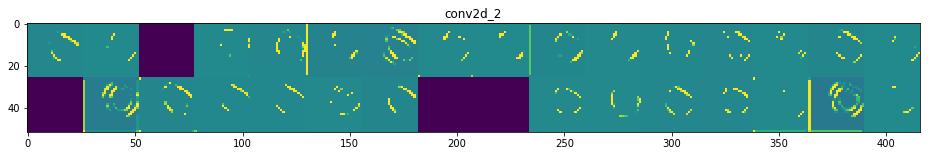

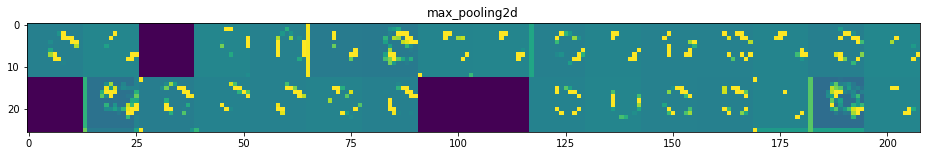

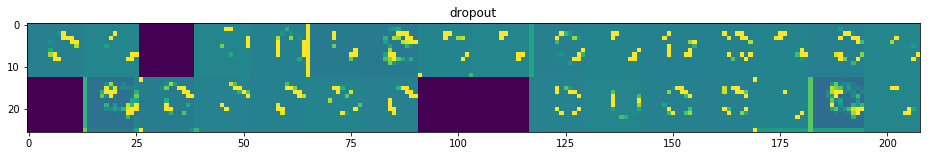

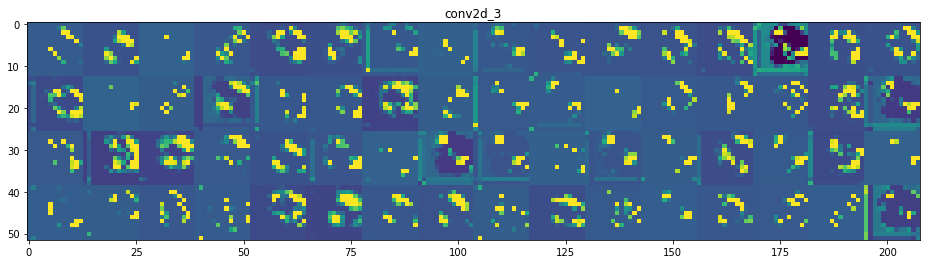

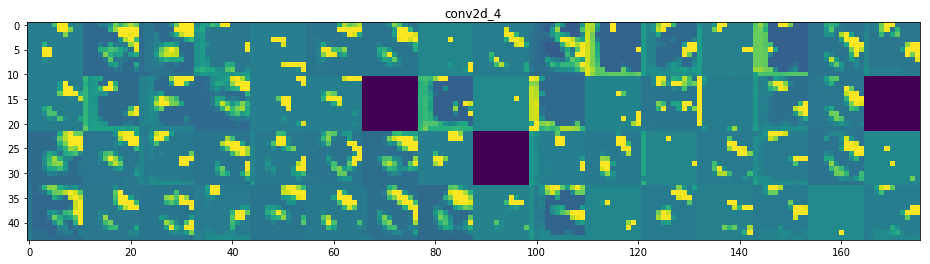

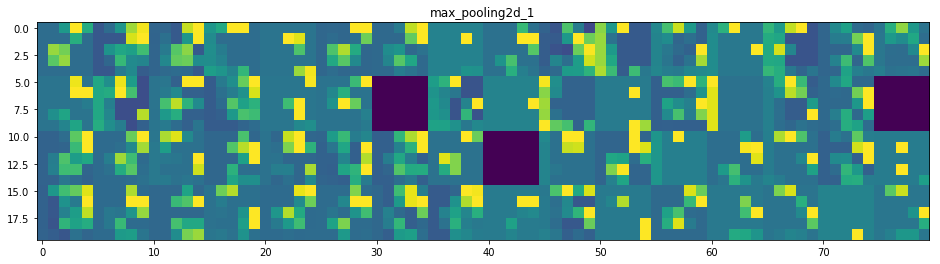

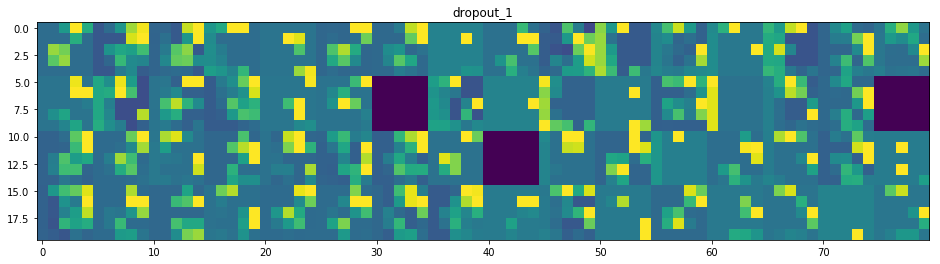

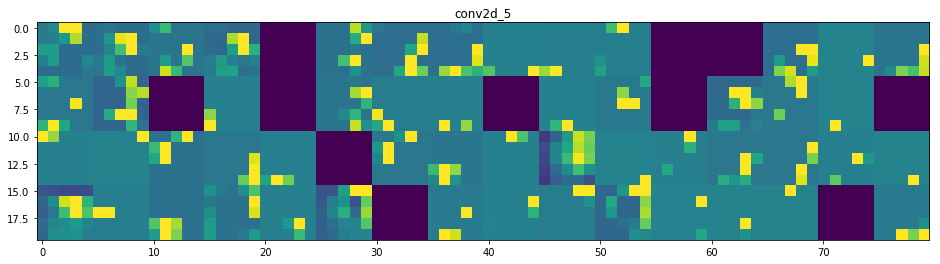

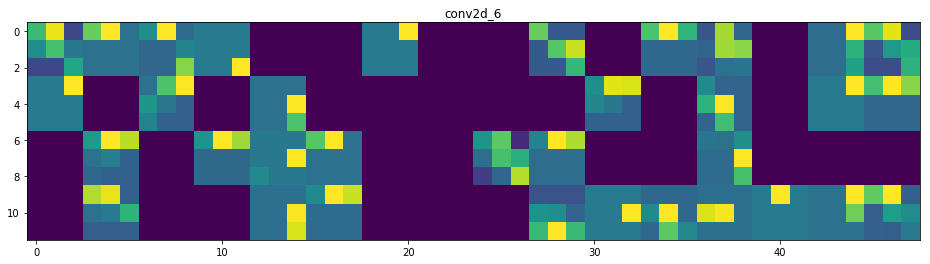

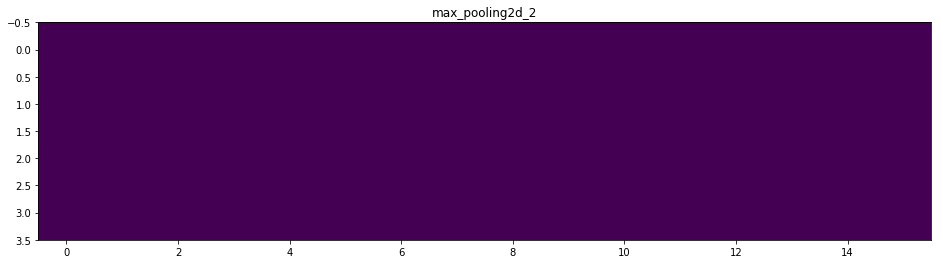

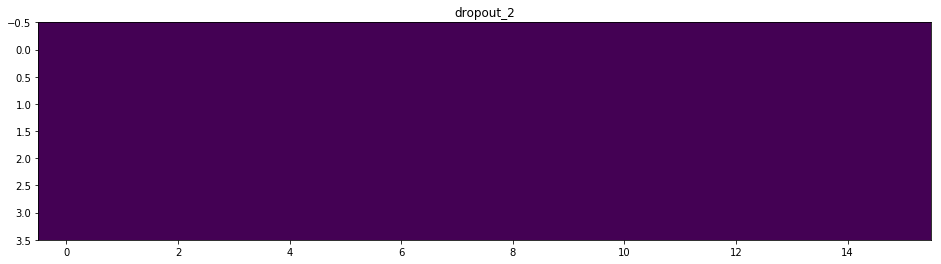

In [109]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')